In [2]:
import itertools
import math as m
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.umath_tests import inner1d

ipykernel_launcher:5: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [31]:
twoPi = 2.0 * m.pi

def free_spectrum( m1_sq, m2_sq, n, nP ):
    energy1 = np.sqrt( m1_sq + inner1d(n,n) )
    energy2 = np.sqrt( m2_sq + inner1d(nP-n,nP-n) )
    return energy1 + energy2

def generate_free_spectrum( mL, mRatio, nP, EcmMax ):
    m1 = mL / twoPi
    m2 = m1 * mRatio
    m1_sq = m1**2
    m2_sq = m2**2
    nMax = 3
    Energies = []
    intList = np.array(np.arange(-nMax,nMax+1))
    for i in itertools.product(intList,intList,intList):
        n = np.array(i)
        En = free_spectrum(m1_sq, m2_sq, n, nP)
        Ecm = np.sqrt( En**2 - np.dot(nP,nP) )
        Ecm = 2.0 * m.pi * Ecm / mL
        Ecm = np.round( Ecm, 10 )
        if Ecm not in Energies:
            if Ecm < EcmMax:
                Energies.append(Ecm)
    Energies.sort()
    return Energies

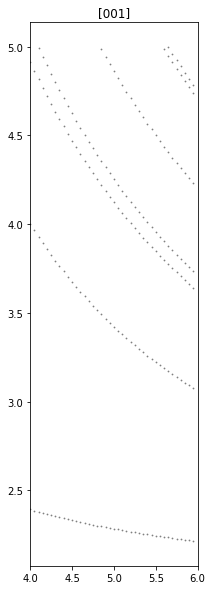

In [47]:
nP = np.array([0,0,1])
Ecm_o_m_Max = 5.0
mRatio = 1.0
Ecm = []
for mL in np.arange (4.0, 6.0, 0.05):
   Ecm.append( generate_free_spectrum( mL, mRatio, nP, Ecm_o_m_Max ) )
   #print( round(mL,6), " ", *Ecm )
mL = np.arange(4.0, 6.0, 0.05)
#Ecm = np.asarray(Ecm)
#Ecm.shape
#mL.shape
#Ecm[45]


plt.figure(figsize=(3,10))
plt.xlim([4, 6])
plt.title("[001]")
for xe, ye in zip(mL, Ecm):
    plt.scatter([xe] * len(ye), ye, s = 0.6, c = "gray")
    


#for Estar in Ecm.reshape(1,len(Ecm)).T:
   # print(Estar)

#plt.plot( mL, Ecm[:] )